In [1]:
import os
print(os.getcwd())

/workspace/projects/a01-eda


In [2]:
import pandas as pd 
dpath_to_data = '../../data/'

df = pd.read_csv(os.path.join(dpath_to_data,'train.csv'))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27100 entries, 0 to 27099
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         27100 non-null  int64 
 1   age        27100 non-null  int64 
 2   job        27100 non-null  object
 3   marital    27100 non-null  object
 4   education  27100 non-null  object
 5   default    27100 non-null  object
 6   balance    27100 non-null  int64 
 7   housing    27100 non-null  object
 8   loan       27100 non-null  object
 9   contact    27100 non-null  object
 10  day        27100 non-null  int64 
 11  month      27100 non-null  object
 12  duration   27100 non-null  int64 
 13  campaign   27100 non-null  int64 
 14  pdays      27100 non-null  int64 
 15  previous   27100 non-null  int64 
 16  poutcome   27100 non-null  object
 17  y          27100 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 3.7+ MB


In [4]:
df_cat = df.loc[:,df.dtypes=='object']

In [5]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27100 entries, 0 to 27099
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        27100 non-null  object
 1   marital    27100 non-null  object
 2   education  27100 non-null  object
 3   default    27100 non-null  object
 4   housing    27100 non-null  object
 5   loan       27100 non-null  object
 6   contact    27100 non-null  object
 7   month      27100 non-null  object
 8   poutcome   27100 non-null  object
dtypes: object(9)
memory usage: 1.9+ MB


# Job

In [6]:
df_cat['job'].value_counts()

blue-collar      5957
management       5346
technician       4915
admin.           3187
services         2471
self-employed    1163
entrepreneur     1155
retired          1004
unemployed        795
housemaid         754
student           353
Name: job, dtype: int64

In [7]:
df.groupby('job')[['age','balance','y']].mean()

,age,balance,y
job,,,
admin.,34.592407,47387.572953,0.086602
blue-collar,34.873762,47290.971630,0.057915
entrepreneur,36.541126,48195.385281,0.082251
housemaid,42.201592,46830.530504,0.090186
management,35.887018,47323.612046,0.086607
retired,49.158367,48926.679283,0.167331
self-employed,35.575236,49427.319862,0.096303
services,34.720761,47448.044516,0.065965
student,34.427762,44967.872521,0.294618


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

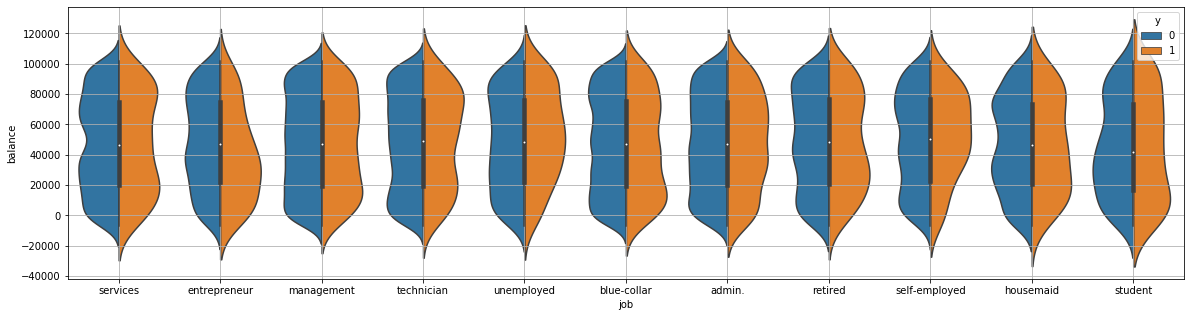

In [9]:
fig,axs = plt.subplots(figsize=(20,5))
sns.violinplot(
    x='job',
    y='balance',
    hue='y',
    split=True,
    data=df,
    ax=axs,
)
axs.grid(True)

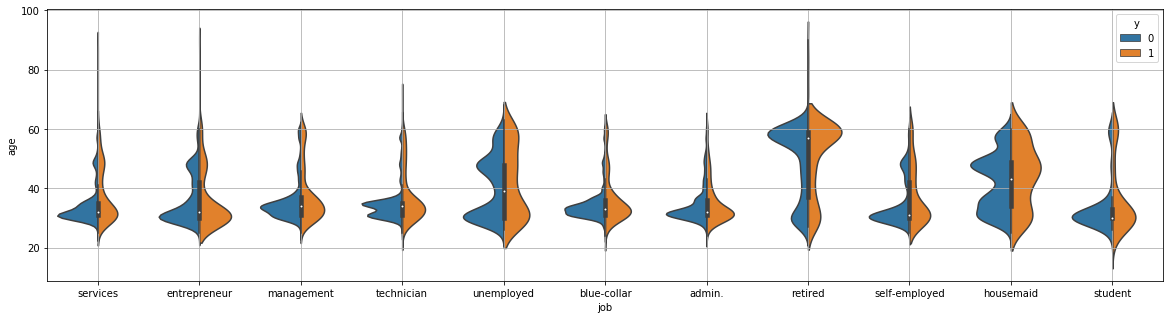

In [10]:
fig,axs = plt.subplots(figsize=(20,5))
sns.violinplot(
    x='job',
    y='age',
    hue='y',
    split=True,
    data=df,
    ax=axs,
)
axs.grid(True)

# Marital

In [11]:
df_cat['marital'].value_counts()

married     17565
single       7100
divorced     2435
Name: marital, dtype: int64

In [12]:
df.groupby('marital')[['age','y']].mean()

,age,y
marital,,
divorced,39.296509,0.064476
married,36.568972,0.062511
single,33.741549,0.120704


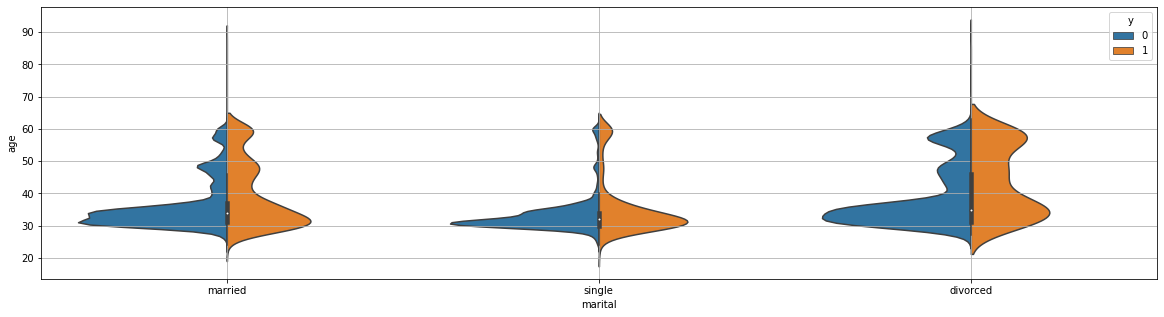

In [13]:
fig,axs = plt.subplots(figsize=(20,5))
sns.violinplot(
    x='marital',
    y='age',
    hue='y',
    split=True,
    data=df,
    ax=axs,
)
axs.grid(True)

# Poutcome

In [14]:
df_cat['poutcome'].value_counts()

unknown    23099
failure     2717
other        826
success      458
Name: poutcome, dtype: int64

In [15]:
df.groupby('poutcome')['y'].mean()

poutcome
failure    0.043798
other      0.048426
success    0.679039
unknown    0.071085
Name: y, dtype: float64

# Housing

In [16]:
df_cat['housing'].value_counts()

yes    15819
no     11281
Name: housing, dtype: int64

In [17]:
df.groupby('housing')['y'].mean()

housing
no     0.130219
yes    0.040647
Name: y, dtype: float64